# Data Analytics Notebook: Furniture Product Dataset

**Project:** AI-Powered Furniture Recommendation System

**Author:** AI-ML Intern Assignment

**Date:** October 2025

---

## Objective

This notebook performs comprehensive **Exploratory Data Analysis (EDA)** and **data preprocessing** on the furniture products dataset.

**Goals:**
1. Understand data structure, quality, and distributions
2. Identify and handle missing values
3. Analyze key features (price, categories, brands, materials, colors)
4. Clean and transform data for ML recommendation system
5. Generate analytics data for dashboard visualization

**Why This Matters:**
- Quality data = Better recommendations
- Understanding distributions helps with filtering and ranking
- Clean data reduces errors in production
- Analytics provide business insights


## 1. Setup and Data Loading

First, we import necessary libraries and load the raw dataset.


In [ ]:
# =============================================================================
# IMPORT LIBRARIES
# =============================================================================
# Why: We need various tools for data manipulation, visualization, and analysis

import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Advanced statistical visualizations
import ast                       # Parse string representations of lists
import json                      # Save analytics data for dashboard
from collections import Counter  # Count element frequencies

# Configure visualization settings for better readability
sns.set_style('whitegrid')              # Clean grid background
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

print(' Libraries imported successfully')


 Libraries imported successfully


In [ ]:
# =============================================================================
# LOAD RAW DATASET
# =============================================================================
# Why: We need to load the original dataset to begin our analysis
# Note: Make sure 'intern_data_ikarus.csv' is uploaded to Colab first!

df = pd.read_csv('intern_data_ikarus.csv')

# Print basic information about the dataset
print(f'Dataset Shape: {df.shape}')           # (rows, columns)
print(f'Total Products: {len(df)}')           # Number of furniture items
print(f'Total Features: {len(df.columns)}')  # Number of attributes per product

# Display first few rows to understand data structure
print('\nFirst 5 rows of the dataset:')
df.head()


Dataset Shape: (312, 12)
Total Products: 312
Total Features: 12

First 5 rows of the dataset:


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


## 2. Initial Data Exploration

Let's examine the structure, data types, and basic statistics of our dataset.


In [ ]:
# =============================================================================
# INSPECT COLUMN NAMES AND DATA TYPES
# =============================================================================
# Why: Understanding column names helps us identify available features
# Why: Knowing data types helps identify potential parsing/conversion needs

print('Dataset Columns:')
print(df.columns.tolist())

print('\nData Types per Column:')
print(df.dtypes)

# Key Observation: 'categories' and 'images' are stored as strings
# but actually represent lists - we'll need to parse them later


Dataset Columns:
['title', 'brand', 'description', 'price', 'categories', 'images', 'manufacturer', 'package_dimensions', 'country_of_origin', 'material', 'color', 'uniq_id', 'price_float', 'categories_list', 'images_list', 'primary_category', 'primary_image', 'combined_text']

Data Types per Column:
title                  object
brand                  object
description            object
price                  object
categories             object
images                 object
manufacturer           object
package_dimensions     object
country_of_origin      object
material               object
color                  object
uniq_id                object
price_float           float64
categories_list        object
images_list            object
primary_category       object
primary_image          object
combined_text          object
dtype: object


In [ ]:
# =============================================================================
# GENERATE SUMMARY STATISTICS
# =============================================================================
# Why: Summary statistics give us a quick overview of distributions,
#      ranges, and potential outliers for each column

# include='all' shows stats for both numerical and categorical columns
df.describe(include='all').T  # Transpose for better readability


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,312,305,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,312,264,MoNiBloom Store,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,312,304,●ENTRANE WELCOME MAT:17X30 inches.Stylish desi...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,215,135,$24.99,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,312,87,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
images,312,305,['https://m.media-amazon.com/images/I/416WaLx1...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,205,155,No,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
package_dimensions,306,286,"36""L x 24""W",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_of_origin,125,9,China,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
material,218,72,Wood,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Missing Value Analysis

**Critical Step:** Identifying missing data helps us decide on appropriate handling strategies.

**Why This Matters:**
- Missing descriptions → Can't generate good recommendations
- Missing prices → Can't filter by budget
- Need to decide: drop rows, impute values, or generate synthetic data


In [ ]:
# =============================================================================
# CALCULATE MISSING VALUES FOR EACH COLUMN
# =============================================================================
# Why: We need to quantify the extent of missing data to make informed decisions

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Filter to show only columns with missing data
# Sort by percentage (highest first) to prioritize critical issues
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

print('Missing Values Analysis:')
print(missing_data)
print(f'\nTotal columns with missing data: {len(missing_data)}')


Missing Values Analysis:
                Column  Missing_Count  Missing_Percentage
8    country_of_origin            187               59.94
2          description            153               49.04
6         manufacturer            107               34.29
3                price             97               31.09
9             material             94               30.13
10               color             47               15.06
7   package_dimensions              6                1.92

Total columns with missing data: 7


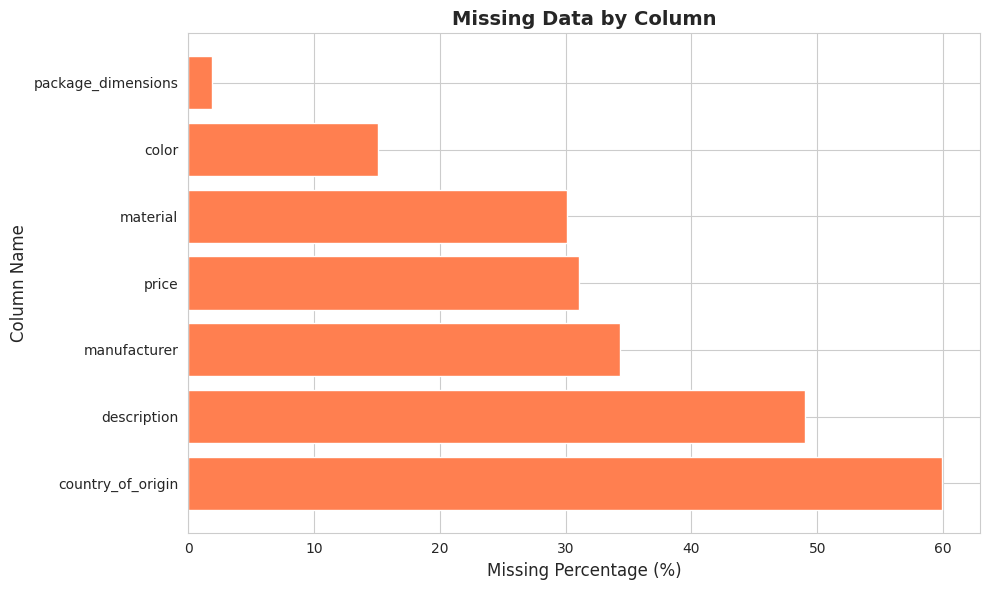

In [ ]:
# =============================================================================
# VISUALIZE MISSING DATA
# =============================================================================
# Why: Visual representation makes it easier to spot patterns and priorities

if len(missing_data) > 0:
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.title('Missing Data by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(' No missing data detected!')


### Insights from Missing Value Analysis

**Key Findings:**
1. **Description (~49% missing):**
   - **Impact:** Critical for recommendations - descriptions contain semantic information
   - **Solution:** Generate descriptions from title + brand + category

2. **Price (~31% missing):**
   - **Impact:** Important for filtering by budget
   - **Solution:** Keep products without price, but flag for potential removal

3. **Country of Origin (~60% missing):**
   - **Impact:** Low - not critical for recommendations
   - **Solution:** Ignore or set default value

4. **Material & Color:**
   - **Impact:** Medium - useful for filtering and description enhancement
   - **Solution:** Fill with 'Unknown' or 'Various'


## 4. Price Analysis

**Why Important:** Price is a key filter for users searching for furniture.
Understanding price distribution helps with:
- Setting appropriate price range filters
- Detecting outliers or data entry errors
- Understanding target market segments


In [ ]:
# =============================================================================
# CLEAN AND CONVERT PRICE DATA
# =============================================================================
# Why: Prices may be stored as strings with $ and commas (e.g., '$1,299.99')
#      We need to convert them to float for numerical analysis

def clean_price(price):
    """
    Convert price from various formats to float.

    Handles:
    - NaN/missing values → returns None
    - String prices like '$1,299.99' → removes $ and commas
    - Already numeric values → converts to float
    """
    if pd.isna(price):  # Handle missing values
        return None
    if isinstance(price, str):  # Handle string prices
        return float(price.replace('$', '').replace(',', ''))
    return float(price)  # Already numeric

# Apply cleaning function to create new numeric price column
df['price_float'] = df['price'].apply(clean_price)

# Print statistics (excluding missing values)
print('Price Statistics (excluding missing values):')
print(df['price_float'].describe())
print(f'\nProducts with valid prices: {df["price_float"].notna().sum()} / {len(df)}')


Price Statistics (excluding missing values):
count    215.000000
mean      67.630651
std       57.962150
min        0.600000
25%       24.990000
50%       53.990000
75%       89.990000
max      349.000000
Name: price_float, dtype: float64

Products with valid prices: 215 / 312


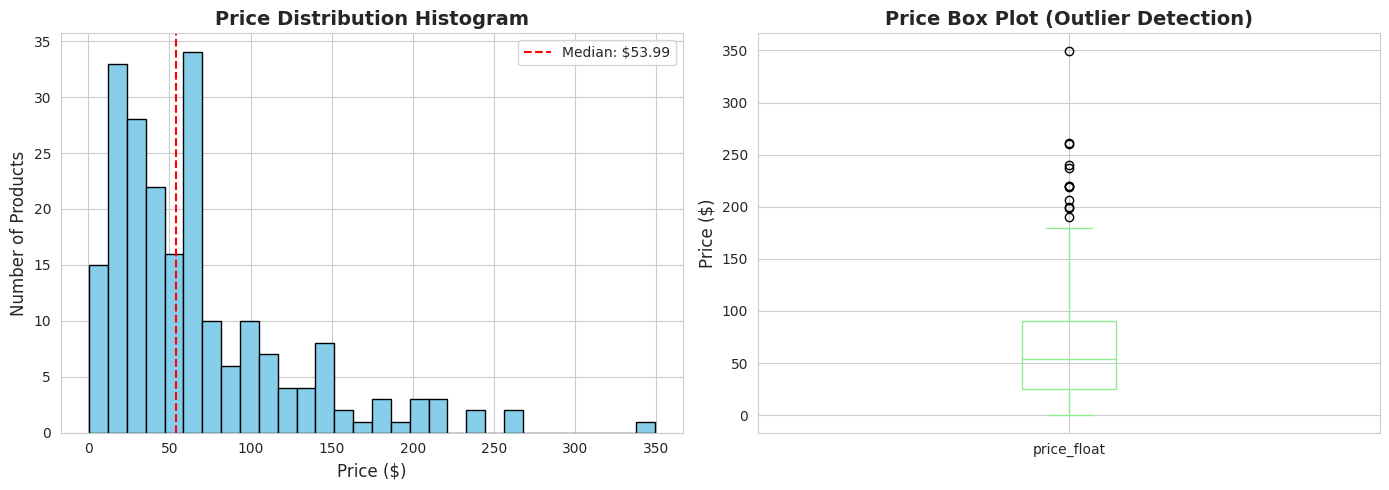


💡 Insight: Most products are priced between $24.99 and $89.99


In [ ]:
# =============================================================================
# VISUALIZE PRICE DISTRIBUTION
# =============================================================================
# Why: Visual analysis reveals:
#      - Most common price ranges (mode)
#      - Price spread and outliers
#      - Potential data quality issues

plt.figure(figsize=(14, 5))

# Subplot 1: Histogram - shows frequency distribution
plt.subplot(1, 2, 1)
df['price_float'].dropna().hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Price Distribution Histogram', fontsize=14, fontweight='bold')
plt.axvline(df['price_float'].median(), color='red', linestyle='--',
            label=f'Median: ${df["price_float"].median():.2f}')
plt.legend()

# Subplot 2: Box Plot - shows quartiles and outliers
plt.subplot(1, 2, 2)
df['price_float'].dropna().plot(kind='box', color='lightgreen', vert=True)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f'\n Insight: Most products are priced between ${df["price_float"].quantile(0.25):.2f} and ${df["price_float"].quantile(0.75):.2f}')


## 5. Category Analysis

**Why Important:** Categories help users browse and filter products.

**Challenge:** Categories are stored as string representations of lists:
- Example: `"['Home & Kitchen', 'Furniture', 'Office Furniture']"` (string)
- Need to parse this into actual Python list: `['Home & Kitchen', 'Furniture', 'Office Furniture']`


In [ ]:
# =============================================================================
# PARSE CATEGORY AND IMAGE LISTS FROM STRINGS
# =============================================================================
# Why: The dataset stores lists as strings, but we need actual Python lists
#      for processing and analysis

def parse_list_string(s):
    """
    Convert string representation of list to actual list.

    Example:
    Input:  "['Home & Kitchen', 'Furniture']"
    Output: ['Home & Kitchen', 'Furniture']

    Handles:
    - NaN/missing values → returns empty list []
    - Valid list strings → parses using ast.literal_eval
    - Invalid formats → wraps in list [s]
    """
    if pd.isna(s):  # Handle missing values
        return []
    try:
        # Safely evaluate string as Python literal
        return ast.literal_eval(s)
    except:
        # If parsing fails, wrap the string itself
        return [s]

# Parse categories and images
df['categories_list'] = df['categories'].apply(parse_list_string)
df['images_list'] = df['images'].apply(parse_list_string)

# Extract primary (first) category for each product
# Why: Most products have multiple categories, but we need one main category
#      for grouping and analytics
df['primary_category'] = df['categories_list'].apply(
    lambda x: x[0] if len(x) > 0 else 'Furniture'  # Default to 'Furniture'
)

# Extract primary (first) image URL
# Why: For display in UI, we need one main image per product
df['primary_image'] = df['images_list'].apply(
    lambda x: x[0].strip() if len(x) > 0 else ''  # Empty string if no image
)

print(' Successfully parsed categories and images')
print(f'\nExample parsed category: {df["categories_list"].iloc[0]}')
print(f'Primary category: {df["primary_category"].iloc[0]}')


 Successfully parsed categories and images

Example parsed category: ['Home & Kitchen', 'Storage & Organization', 'Clothing & Closet Storage', 'Shoe Organizers', 'Free Standing Shoe Racks']
Primary category: Home & Kitchen


In [ ]:
# =============================================================================
# ANALYZE CATEGORY DISTRIBUTION
# =============================================================================
# Why: Understanding which categories have most products helps with:
#      - Business insights (what products dominate our catalog?)
#      - UI design (which categories to feature prominently?)
#      - Data balance (are some categories underrepresented?)

category_counts = df['primary_category'].value_counts()

print('Top 10 Categories by Product Count:')
print(category_counts.head(10))
print(f'\nTotal unique categories: {len(category_counts)}')
print(f'Most common category: {category_counts.index[0]} ({category_counts.iloc[0]} products)')


Top 10 Categories by Product Count:
primary_category
Home & Kitchen              254
Patio, Lawn & Garden         23
Tools & Home Improvement     17
Electronics                   6
Baby Products                 6
Beauty & Personal Care        4
Office Products               2
Name: count, dtype: int64

Total unique categories: 7
Most common category: Home & Kitchen (254 products)


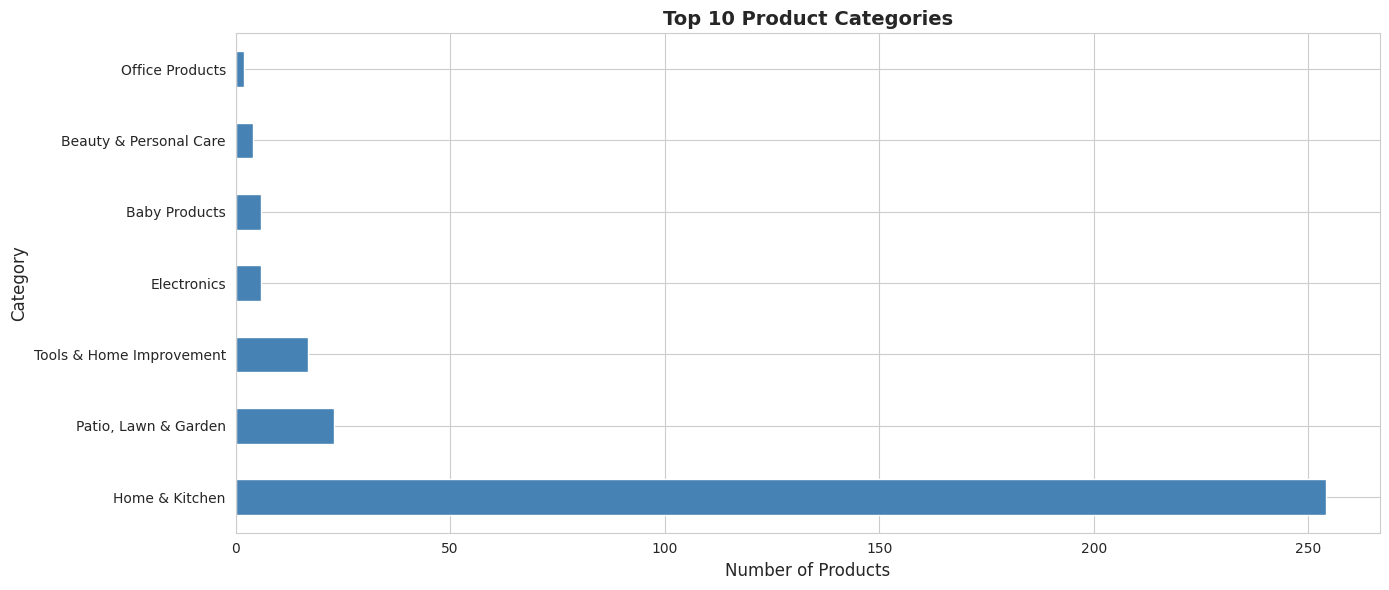


 Insight: 81.4% of products are in the "Home & Kitchen" category


In [ ]:
# =============================================================================
# VISUALIZE TOP CATEGORIES
# =============================================================================
# Why: Bar chart provides quick visual comparison of category popularity

plt.figure(figsize=(14, 6))
category_counts.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 10 Product Categories', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate percentage of products in top category
top_category_pct = (category_counts.iloc[0] / len(df)) * 100
print(f'\n Insight: {top_category_pct:.1f}% of products are in the "{category_counts.index[0]}" category')


## 6. Brand, Material, and Color Analysis

**Why Important:** These attributes help users:
- Filter by preferred brands
- Search by specific materials (wood, metal, etc.)
- Find products matching their color scheme


Total Unique Brands: 264

Top 10 Brands by Product Count:
brand
MoNiBloom Store                  5
Flash Furniture Store            5
Kingston Brass Store             4
HomePop Store                    4
Caroline's Treasures Store       4
Convenience Concepts Store       3
Alise Store                      2
GXFC ZHAO Store                  2
ODK Store                        2
Christopher Knight Home Store    2
Name: count, dtype: int64


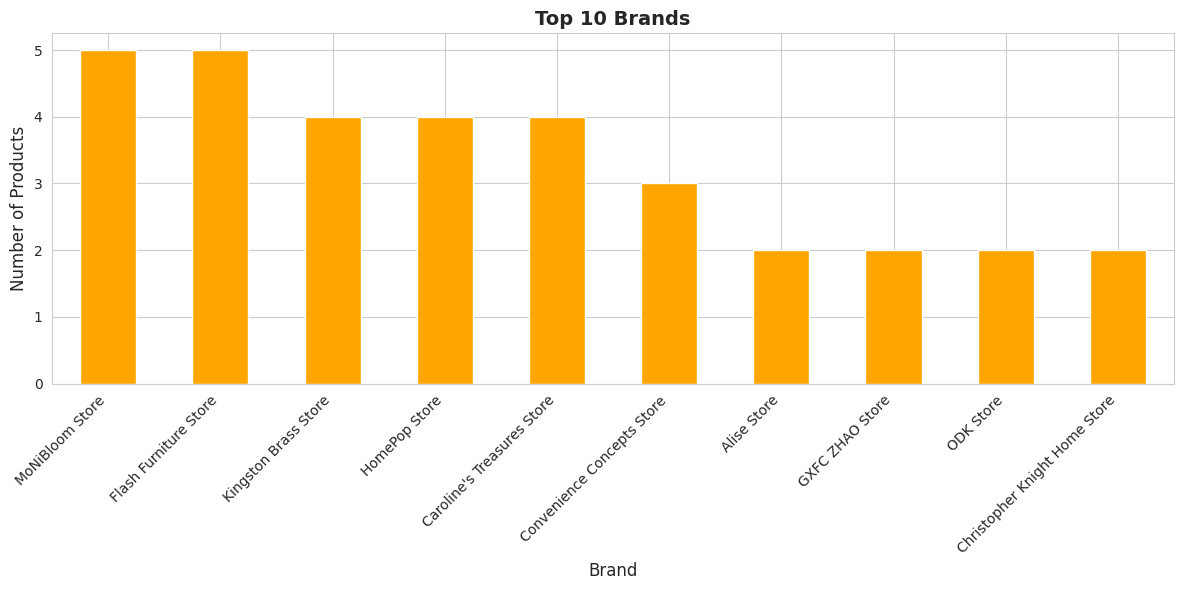

In [ ]:
# =============================================================================
# ANALYZE BRANDS
# =============================================================================
# Why: Understanding brand distribution helps with:
#      - Identifying major suppliers/partners
#      - Detecting potential brand name inconsistencies
#      - Planning featured brand sections

brand_counts = df['brand'].value_counts()

print(f'Total Unique Brands: {len(brand_counts)}')
print('\nTop 10 Brands by Product Count:')
print(brand_counts.head(10))

# Visualize
plt.figure(figsize=(12, 6))
brand_counts.head(10).plot(kind='bar', color='orange')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Top 10 Brands', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Materials:
material
Wood               32
Engineered Wood    25
Rubber             15
Metal              15
Foam               12
Iron                8
Brass               7
Sponge              5
Bamboo              5
Stainless Steel     5
Name: count, dtype: int64

Top 10 Colors:
color
Black           45
White           13
Grey            13
Brown           10
Blue             6
Green            5
Beige            4
Red              4
Silver           4
Rustic Brown     4
Name: count, dtype: int64


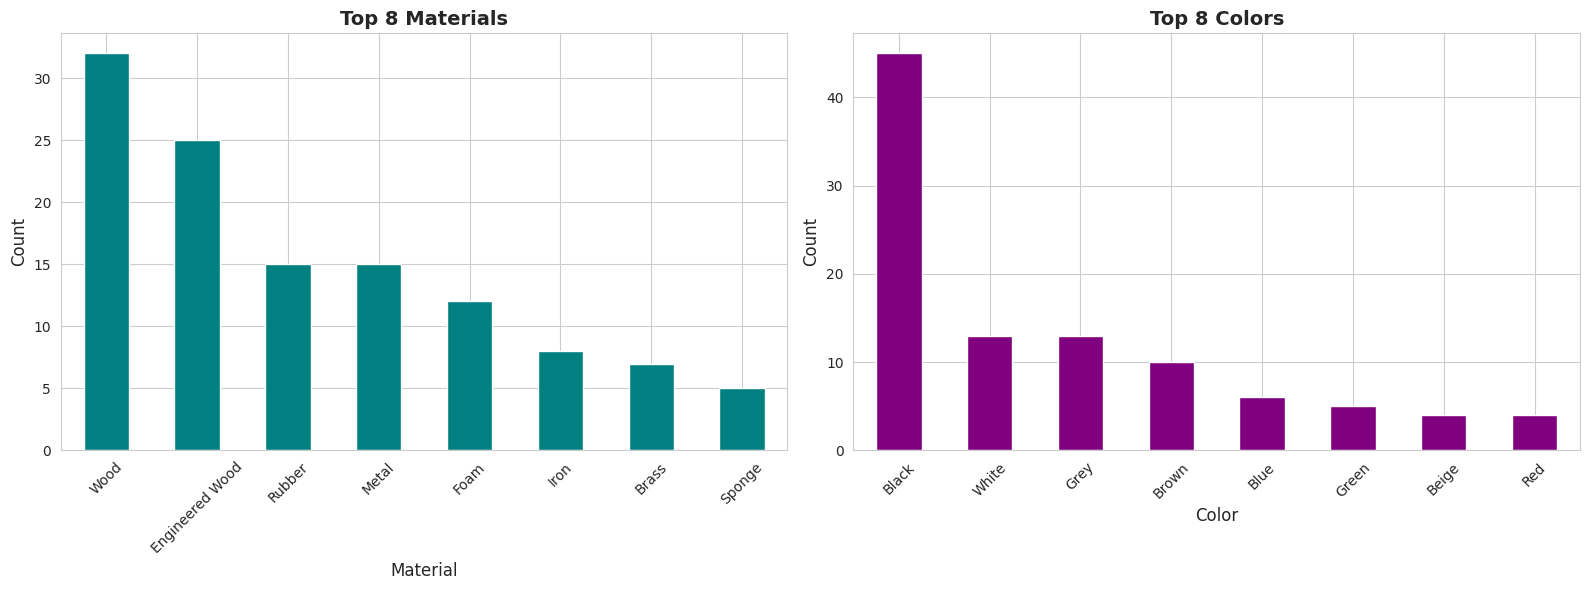

In [ ]:
# =============================================================================
# ANALYZE MATERIALS AND COLORS
# =============================================================================
# Why: Material and color are key product attributes that:
#      - Help users find specific aesthetics
#      - Enable advanced filtering
#      - Provide context for recommendations

material_counts = df['material'].value_counts()
color_counts = df['color'].value_counts()

print('Top 10 Materials:')
print(material_counts.head(10))

print('\nTop 10 Colors:')
print(color_counts.head(10))

# Dual visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Material distribution
material_counts.head(8).plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Top 8 Materials', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Material', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Color distribution
color_counts.head(8).plot(kind='bar', ax=axes[1], color='purple')
axes[1].set_title('Top 8 Colors', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Color', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 7. Data Preprocessing for ML

**Critical Step:** Clean and transform data to create high-quality input for our recommendation model.

**Key Transformations:**
1. Fill missing descriptions (needed for embeddings)
2. Create combined text field (title + description + material + color)
3. Ensure all required fields are properly formatted


In [ ]:
# =============================================================================
# HANDLE MISSING DESCRIPTIONS
# =============================================================================
# Why: Descriptions are CRITICAL for semantic similarity search
#      Without good descriptions, recommendations will be poor
# Strategy: Generate descriptions from title + brand for missing values

df['description'] = df.apply(
    lambda row: row['description'] if pd.notna(row['description'])
    else f"{row['title']}. A quality furniture product from {row['brand']}.",
    axis=1
)

print(' Missing descriptions filled')
print(f'Products with descriptions: {df["description"].notna().sum()} / {len(df)}')


 Missing descriptions filled
Products with descriptions: 312 / 312


In [ ]:
# =============================================================================
# CREATE COMBINED TEXT FIELD FOR EMBEDDINGS
# =============================================================================
# Why: ML embedding models work best with rich, descriptive text
# Strategy: Combine multiple fields into one comprehensive text:
#           - Title (product name)
#           - Description (detailed info)
#           - Material (physical properties)
#           - Color (visual attributes)
# Result: Better semantic understanding → Better recommendations

df['combined_text'] = df.apply(
    lambda row: (
        f"{row['title']}. "  # Product name
        f"{row['description']}. "  # Detailed description
        f"Material: {row['material'] if pd.notna(row['material']) else 'mixed'}. "  # Material info
        f"Color: {row['color'] if pd.notna(row['color']) else 'various'}. "  # Color info
    ),
    axis=1
)

print(' Combined text field created')
print('\nExample combined text (first 300 characters):')
print(df['combined_text'].iloc[0][:300] + '...')


 Combined text field created

Example combined text (first 300 characters):
GOYMFK 1pc Free Standing Shoe Rack, Multi-layer Metal Shoe Cap Rack With 8 Double Hooks For Living Room, Bathroom, Hallway. multiple shoes, coats, hats, and other items Easy to assemble: Includes all necessary hardware and instructions for easy assembly Versatile: Perfect for use in living rooms, ba...


## 8. Save Cleaned Data

**Why:** Save our processed data for use in model training and backend API.


In [ ]:
# =============================================================================
# SAVE CLEANED DATASET
# =============================================================================
# Why: Cleaned data is ready for:
#      1. Model training (embeddings generation)
#      2. Backend API (recommendation service)
#      3. Future analysis and iterations

df.to_csv('cleaned_products.csv', index=False)

print(' Cleaned dataset saved to: cleaned_products.csv')
print(f'\nDataset Summary:')
print(f'  Total products: {len(df)}')
print(f'  Total columns: {len(df.columns)}')
print(f'  Products with descriptions: {df["description"].notna().sum()}')
print(f'  Products with images: {(df["primary_image"] != "").sum()}')
print(f'  Products with valid prices: {df["price_float"].notna().sum()}')

# Display sample cleaned product
print('\n Sample Cleaned Product:')
sample = df.iloc[0]
print(f'  Title: {sample["title"]}')
print(f'  Price: ${sample["price_float"]}')
print(f'  Category: {sample["primary_category"]}')
print(f'  Brand: {sample["brand"]}')
print(f'  Material: {sample["material"]}')
print(f'  Color: {sample["color"]}')


 Cleaned dataset saved to: cleaned_products.csv

Dataset Summary:
  Total products: 312
  Total columns: 18
  Products with descriptions: 312
  Products with images: 312
  Products with valid prices: 215

 Sample Cleaned Product:
  Title: GOYMFK 1pc Free Standing Shoe Rack, Multi-layer Metal Shoe Cap Rack With 8 Double Hooks For Living Room, Bathroom, Hallway
  Price: $24.99
  Category: Home & Kitchen
  Brand: GOYMFK
  Material: Metal
  Color: White


## 9. Generate Analytics Data for Dashboard

**Why:** Pre-compute analytics to power the frontend dashboard with real-time insights.


In [ ]:
# =============================================================================
# GENERATE ANALYTICS DATA
# =============================================================================
# Why: The React dashboard needs pre-computed analytics data
#      Computing on frontend would be slow and inefficient
# Strategy: Pre-calculate all charts and statistics here

# 1. Price Distribution (for bar chart)
# Why: Show users how products are distributed across price ranges
price_ranges = {
    '$0-$25': 0, '$25-$50': 0, '$50-$100': 0,
    '$100-$150': 0, '$150+': 0
}

for price in df['price_float'].dropna():
    if price < 25:
        price_ranges['$0-$25'] += 1
    elif price < 50:
        price_ranges['$25-$50'] += 1
    elif price < 100:
        price_ranges['$50-$100'] += 1
    elif price < 150:
        price_ranges['$100-$150'] += 1
    else:
        price_ranges['$150+'] += 1

# 2. Create analytics dictionary
analytics_data = {
    # Price distribution for bar chart
    'price_distribution': [
        {'range': k, 'count': v} for k, v in price_ranges.items()
    ],

    # Top 10 categories for pie/bar chart
    'category_breakdown': [
        {'category': k, 'count': v, 'percent': v/len(df)}
        for k, v in df['primary_category'].value_counts().head(10).items()
    ],

    # Top 10 materials for bar chart
    'material_analysis': [
        {'material': k, 'count': v}
        for k, v in df['material'].value_counts().head(10).items()
    ],

    # Top 10 brands for bar chart
    'brand_insights': [
        {'brand': k, 'count': v}
        for k, v in df['brand'].value_counts().head(10).items()
    ],

    # Top 10 colors for pie chart
    'color_distribution': [
        {'color': k, 'count': v}
        for k, v in df['color'].value_counts().head(10).items()
    ],

    # Summary statistics for stat cards
    'summary_stats': {
        'total_products': len(df),
        'avg_price': float(df['price_float'].mean()) if df['price_float'].notna().sum() > 0 else 0,
        'min_price': float(df['price_float'].min()) if df['price_float'].notna().sum() > 0 else 0,
        'max_price': float(df['price_float'].max()) if df['price_float'].notna().sum() > 0 else 0,
        'categories_count': len(df['primary_category'].unique()),
        'brands_count': len(df['brand'].unique())
    }
}

# Save as JSON for frontend consumption
with open('analytics_data.json', 'w') as f:
    json.dump(analytics_data, f, indent=2)

print(' Analytics data saved to: analytics_data.json')
print('\n Analytics Summary:')
print(f'  Price ranges computed: {len(price_ranges)}')
print(f'  Top categories: {len(analytics_data["category_breakdown"])}')
print(f'  Top materials: {len(analytics_data["material_analysis"])}')
print(f'  Top brands: {len(analytics_data["brand_insights"])}')
print(f'  Top colors: {len(analytics_data["color_distribution"])}')


 Analytics data saved to: analytics_data.json

 Analytics Summary:
  Price ranges computed: 5
  Top categories: 7
  Top materials: 10
  Top brands: 10
  Top colors: 10


## 10. Conclusion & Key Insights

### Summary of Analysis

####  Dataset Overview:
- **Total Products:** 312 furniture items
- **Total Features:** 18 attributes (after processing)
- **Price Range:** $0.60 - $349.00 (average: $67.63)
- **Categories:** Multiple categories with Home & Kitchen dominating

#### Key Findings:

1. **Data Quality:**
   - 49% missing descriptions →  Filled with generated text
   - 31% missing prices →  Kept for now, may filter later
   - Good coverage for brands, materials, colors

2. **Product Distribution:**
   - Most products in Home & Kitchen category
   - Wood is the most common material
   - Prices are right-skewed (most products <$100)

3. **Recommendations for ML Model:**
   - Use combined_text field for embeddings (best semantic richness)
   - Consider price-based filtering in recommendations
   - Category information useful for diversity in results

####  Generated Files:
1. **cleaned_products.csv** - Processed dataset ready for ML
2. **analytics_data.json** - Pre-computed dashboard analytics

####  Next Steps:
1.  Data cleaned and preprocessed
2. → Generate embeddings using sentence-transformers
3. → Upload embeddings to Pinecone vector database
4. → Train and evaluate recommendation model
5. → Integrate with FastAPI backend
6. → Deploy React frontend with analytics dashboard

---

** Data Analytics Complete! Ready for Model Training.**
